In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def filtering_func(freqs, fft, f1, f2): #passing complex numbers
    n = max(np.abs(fft))
    filtered_fft = fft.copy() #in this way it doesn't reference to fft

    fft_in_range = np.abs(fft[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)])
    print(f'fft_in_range: {fft_in_range/n} ')

    peak = np.max(fft_in_range)

    peak_indices = np.where(fft_in_range == peak)[0]
    print(f"peak_indices: {peak_indices}")

    print(f"fft[peak_indices]: {fft_in_range[peak_indices]/n}")

    peak_f = freqs[(freqs >= f1) & (freqs <= f2) | (freqs >= -f2) & (freqs <= -f1)][peak_indices]
    print(f"peak_f: {peak_f}")

    fft_in_range[peak_indices] = np.nan
    range_avg = np.nanmean(fft_in_range) #compute the mean excluding the point you are filtering
    print(f'range_avg: {range_avg/n}')

    print(f'sum: {np.sum(np.isin(freqs, peak_f))}') #make sure you are filtering only 1 frequency
    filtered_fft[np.isin(freqs, peak_f)] = complex(range_avg, 0)
    range_avg = range_avg/n
    return filtered_fft, range_avg, peak_f

In [3]:
hour = '15.42'
day = '08082024'

In [4]:
file = f"../../Waveforms/{day}/{day}_{hour}/{day}_{hour}_wf.csv/{day}_{hour}_wf_01.csv"

df = pd.read_csv(file)
print(df)
times = pd.to_numeric(df.iloc[1:, 0], errors = 'coerce').values #errors = 'coerce' converts invalid parsing values (such as strings that can't be converted to numbers) into NaN
amplitudes = pd.to_numeric(df.iloc[1:, 1], errors='coerce').values 

              Time    Channel D
0             (us)         (mV)
1       0.00000000  -1.96850400
2       0.00080000  -1.57480300
3       0.00160000  -1.18110200
4       0.00240000  -0.78740150
...            ...          ...
62500  49.99920067   0.00000000
62501  50.00000067   0.39370070
62502  50.00080067  -0.39370070
62503  50.00160067  -1.18110200
62504  50.00240067  -1.18110200

[62505 rows x 2 columns]


In [5]:
N = len(times)
print(f"len(times): {N}")

len(times): 62504


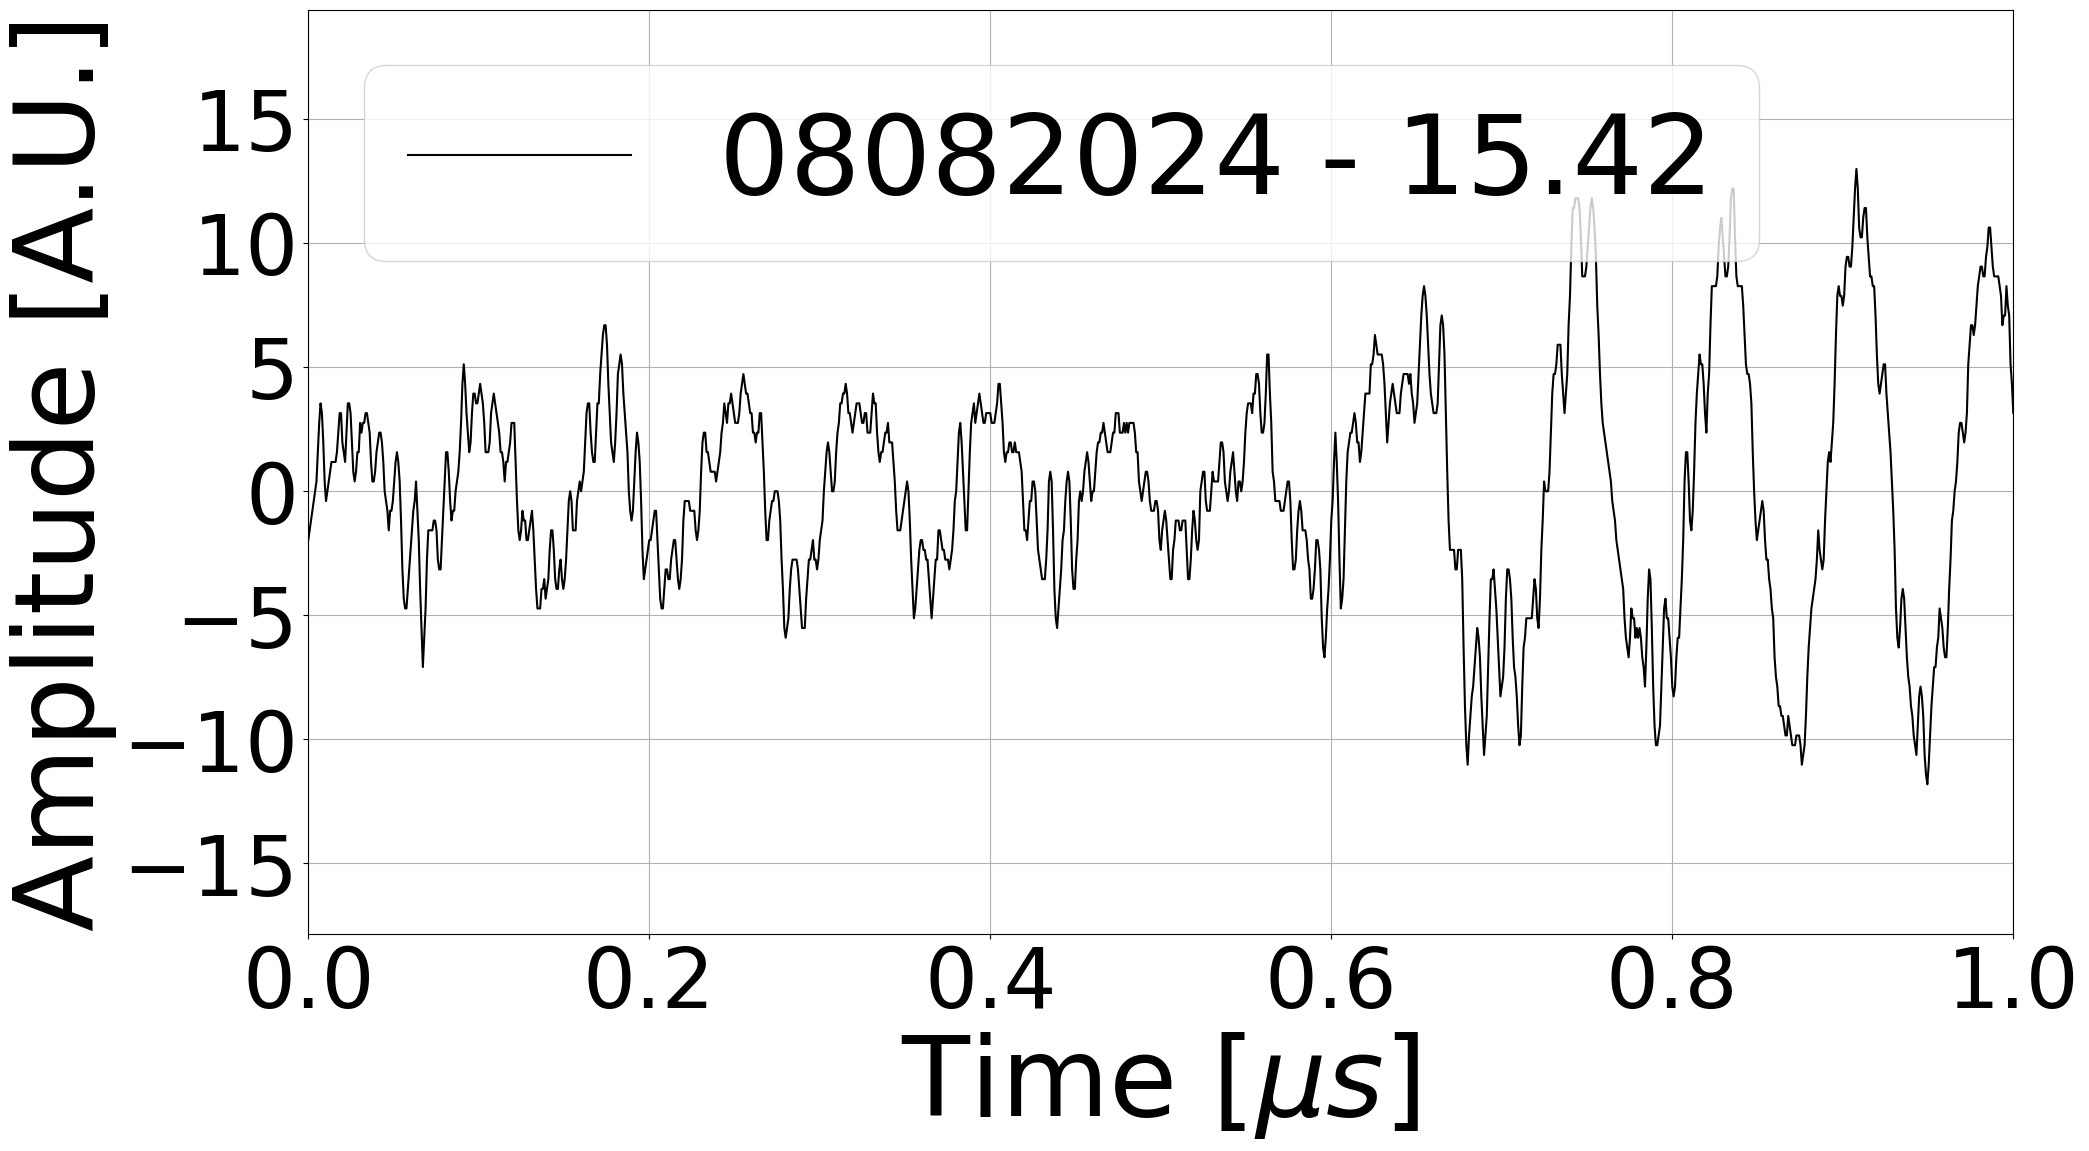

In [30]:
plt.figure(figsize = (22, 12))
plt.plot(times, amplitudes, label = '08082024 - 15.42', color = 'k')

plt.title('', fontsize = 80)
plt.xlabel(r'Time [$\mu s$]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 80)
plt.grid(True)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

## FFT

In [32]:
span = times[-1]
print(f"span: {span}") 
step = span / N
f_s = 1 / step
print(f"f_s = {f_s}")

freqs = fft.fftfreq(N, 1/f_s) #window lenght, sample spacing
print(f'last freq: {freqs[-1]}') ##this should be the half of f_s.
print(f"len(freqs): {len(freqs)}")
print(freqs)

span: 50.00240067
f_s = 1250.0199822905824
last freq: -0.019999039778103522
len(freqs): 62504
[ 0.          0.01999904  0.03999808 ... -0.05999712 -0.03999808
 -0.01999904]


In [8]:
magnitudes = fft.fft(amplitudes) #when i'm filtering, i'm filtering something complex
n = np.max(np.abs(magnitudes))

phases = np.angle(magnitudes)

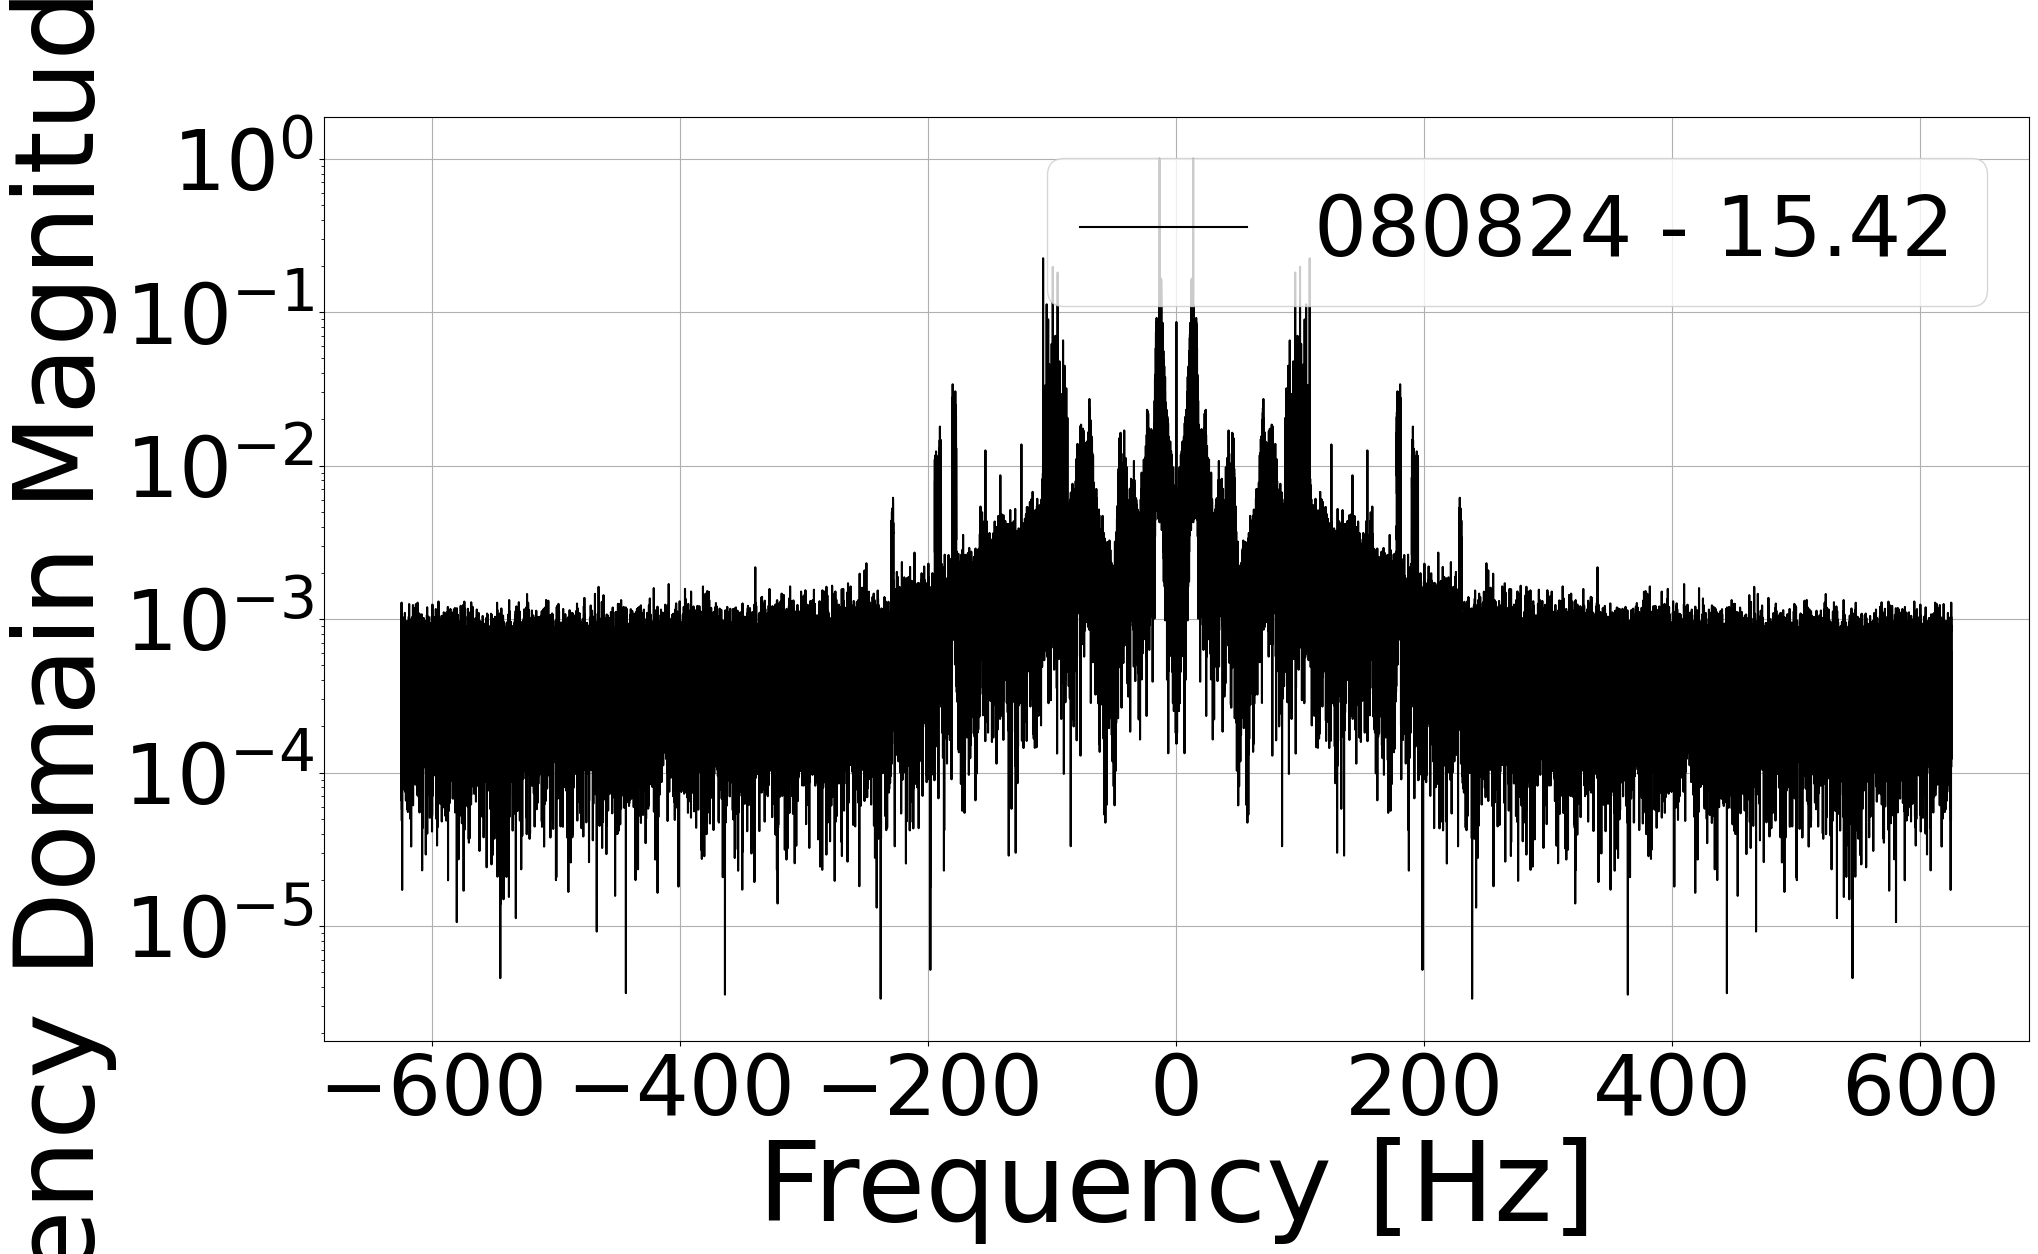

In [44]:
freqs_shifted = fft.fftshift(freqs)
magnitudes_shifted = fft.fftshift(magnitudes)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', label = '080824 - 15.42')
plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [Hz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Frequency Domain Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.semilogy()
plt.legend(fontsize = 60)
plt.grid(True)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [10]:
if (N%2 == 0):
    pos_freqs = freqs[:round((N/2))]
    pos_magnitudes = magnitudes[:round((N/2))]
    pos_phases = phases[:round((N/2))]
    pos_amplitudes = amplitudes[:round((N/2))]
else:
    pos_freqs = freqs[:round((N-1)/2 + 1)]
    pos_magnitudes = magnitudes[:round((N-1)/2 + 1)]
    pos_phases = phases[:round((N-1)/2 + 1)]
    pos_amplitudes = amplitudes[:round((N-1)/2 + 1)]

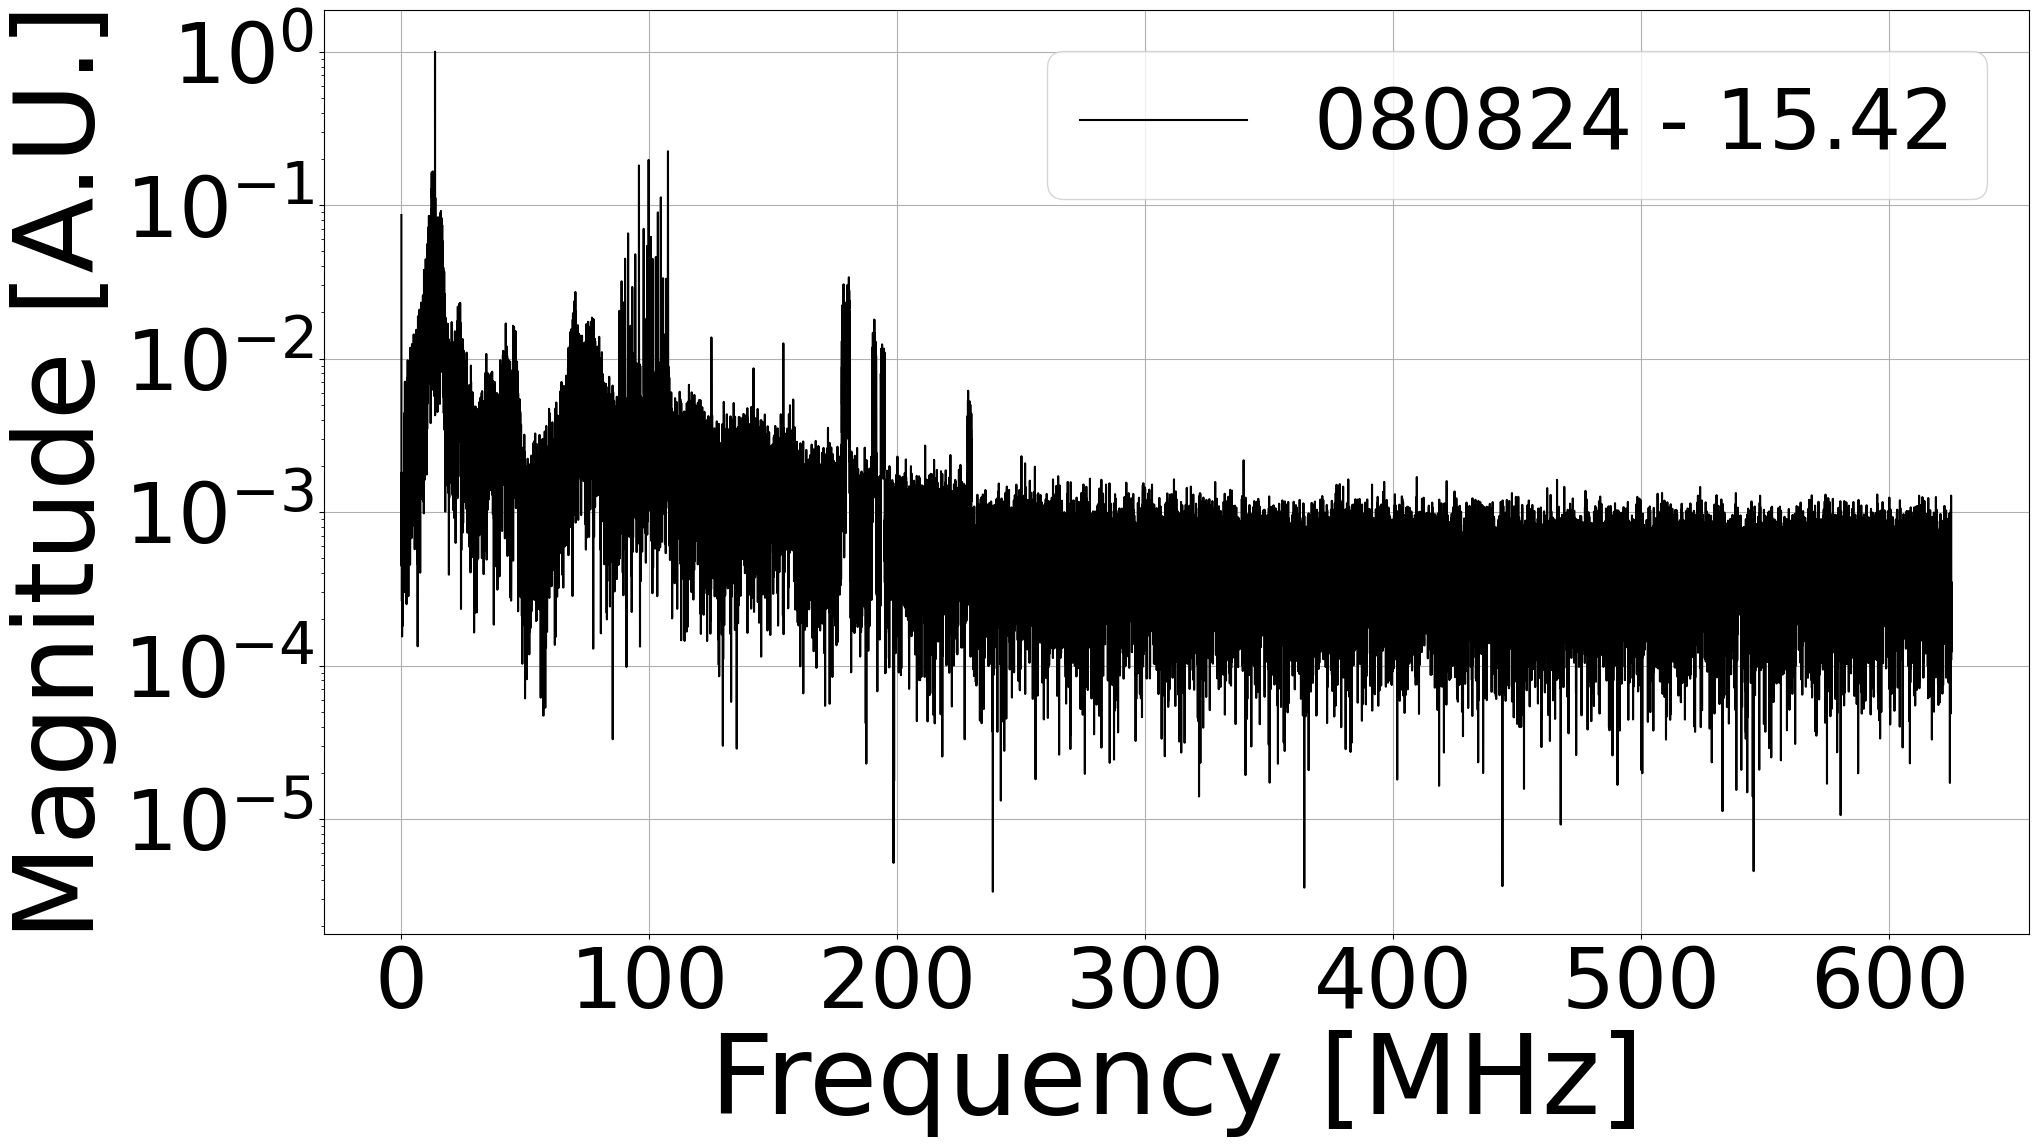

In [41]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, color = 'k', label = '080824 - 15.42')
plt.title('', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.semilogy()
plt.grid(True)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_fft.png", format = "png", bbox_inches="tight")
plt.savefig("../Results/080824_15.42/Presentation/single_fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

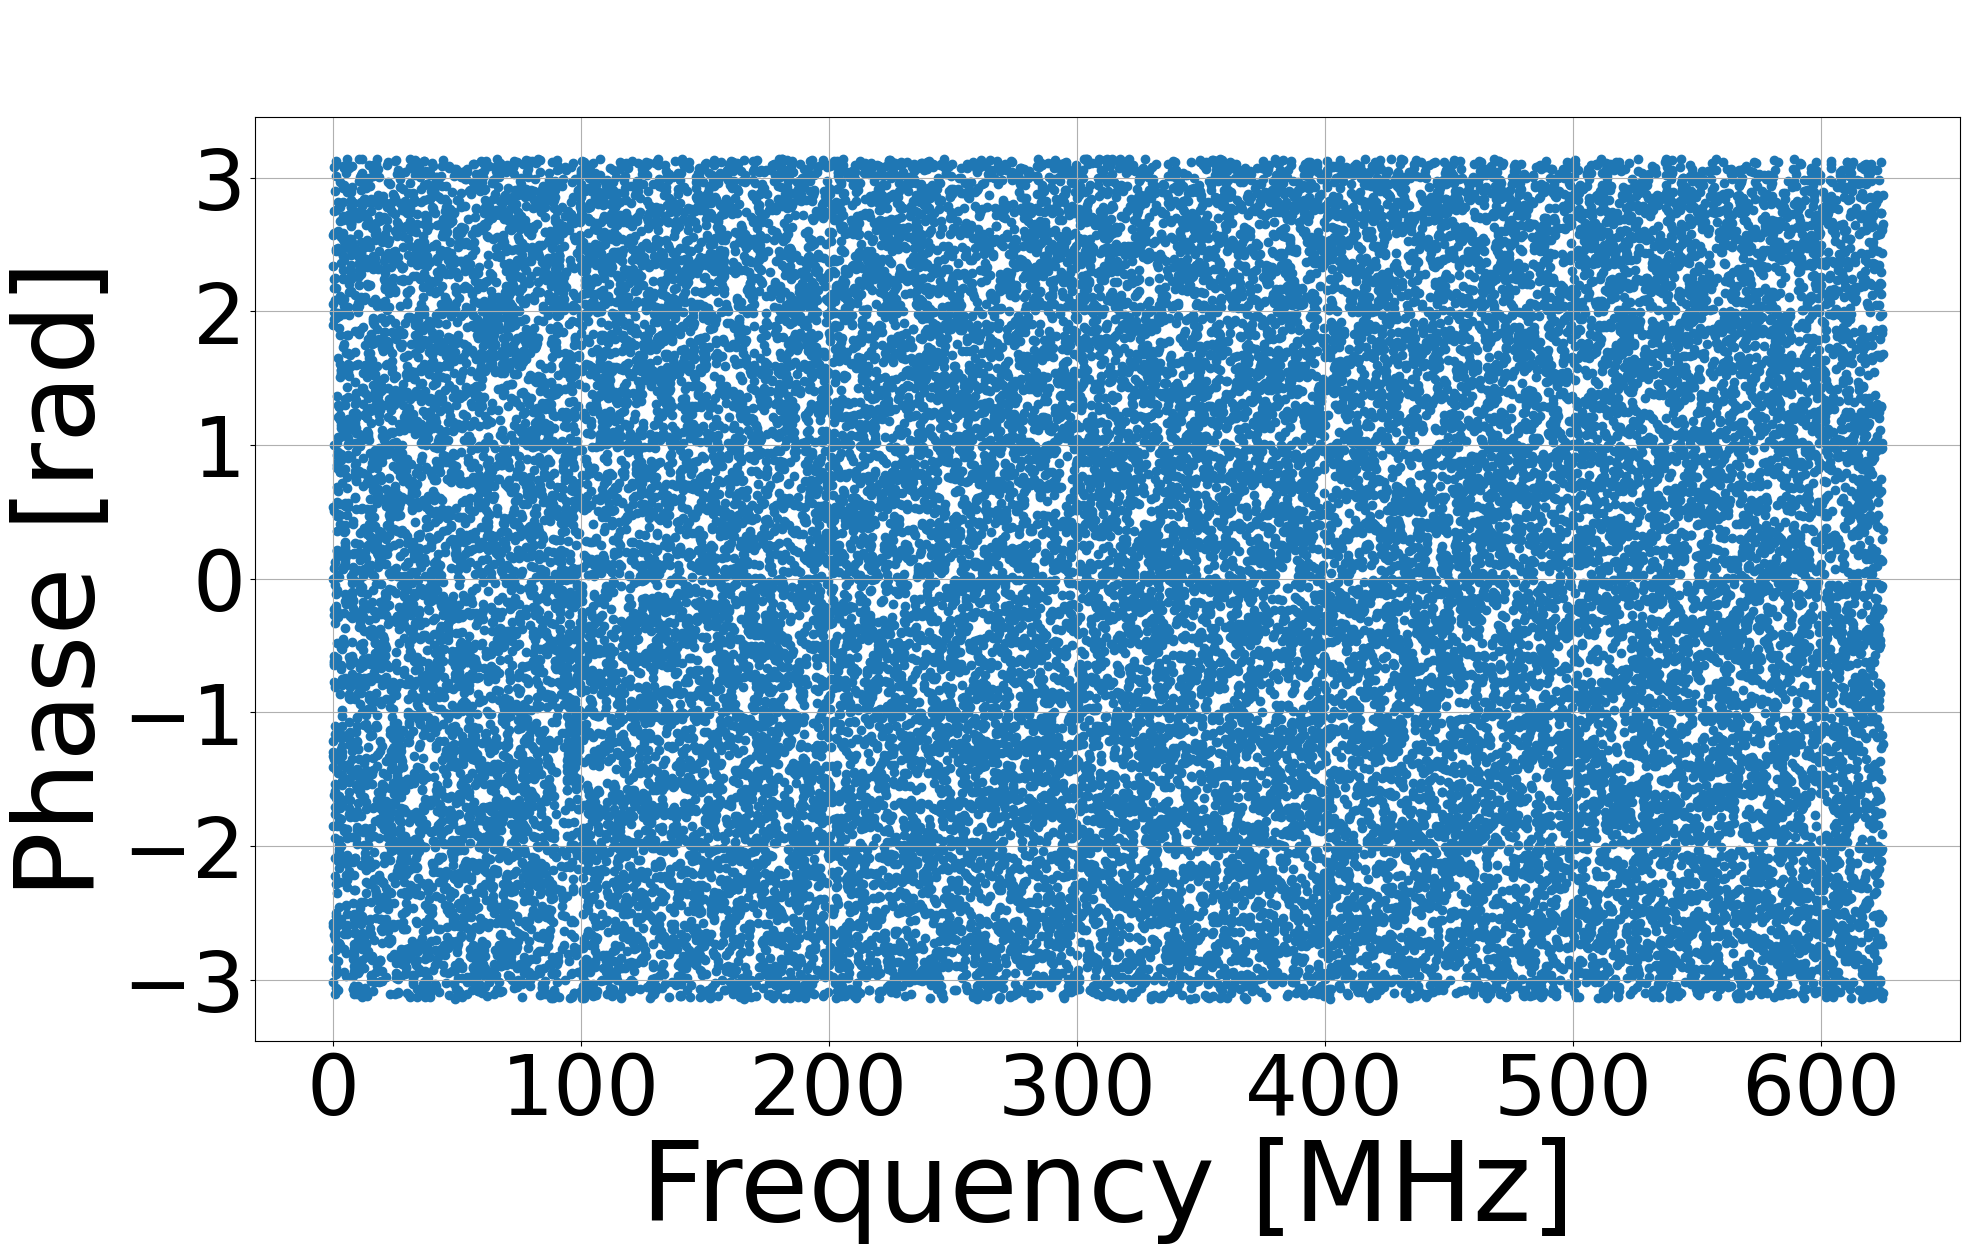

In [40]:
plt.figure(figsize=(22, 12))
plt.scatter(pos_freqs, pos_phases)

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Phase [rad]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [50]:
f1 = 13
f2 = 15

In [51]:
print(f"positive peak frequency: {pos_freqs[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]} MHz")
print(f"positive peak phase: {pos_phases[(pos_freqs >= f1) & (pos_freqs <= f2)][np.argmax(pos_magnitudes[(pos_freqs <= f2) & (pos_freqs >= f1)])]*180/np.pi} deg")

positive peak frequency: 13.679343208222804 MHz
positive peak phase: 19.324525707928867 deg


## Filtering

In [52]:
filtered_fft, range_avg, peak_f = filtering_func(freqs, magnitudes, f1, f2) #passing the complete spectrum

fft_in_range: [0.0762168  0.0107635  0.02603205 0.02633249 0.03072497 0.02287136
 0.02632188 0.05140665 0.03874703 0.04172169 0.07139024 0.01945083
 0.00569868 0.07319668 0.01907562 0.04363482 0.08118695 0.01557017
 0.02146168 0.03524504 0.02287368 0.02414727 0.05788075 0.0191659
 0.03458166 0.04279556 0.01753028 1.         0.06547901 0.00427301
 0.02437413 0.02379473 0.09789789 0.11156967 0.04304974 0.03706389
 0.0343587  0.00732546 0.0232713  0.0102553  0.04655226 0.02073687
 0.00615002 0.0177695  0.01746198 0.02140888 0.00758249 0.05552346
 0.03690097 0.01927078 0.01456061 0.02801863 0.0235193  0.03857566
 0.0067826  0.0133522  0.02261865 0.02413691 0.00919777 0.03781892
 0.03213245 0.01579519 0.01885737 0.0199006  0.01383012 0.06246656
 0.03658809 0.03919233 0.02968932 0.03214615 0.04015156 0.01771967
 0.03016074 0.0045048  0.01715356 0.03807455 0.02631739 0.05078939
 0.03320369 0.00614373 0.01071726 0.08308809 0.05795816 0.02736288
 0.05122623 0.02551056 0.00452943 0.02555318 0.03

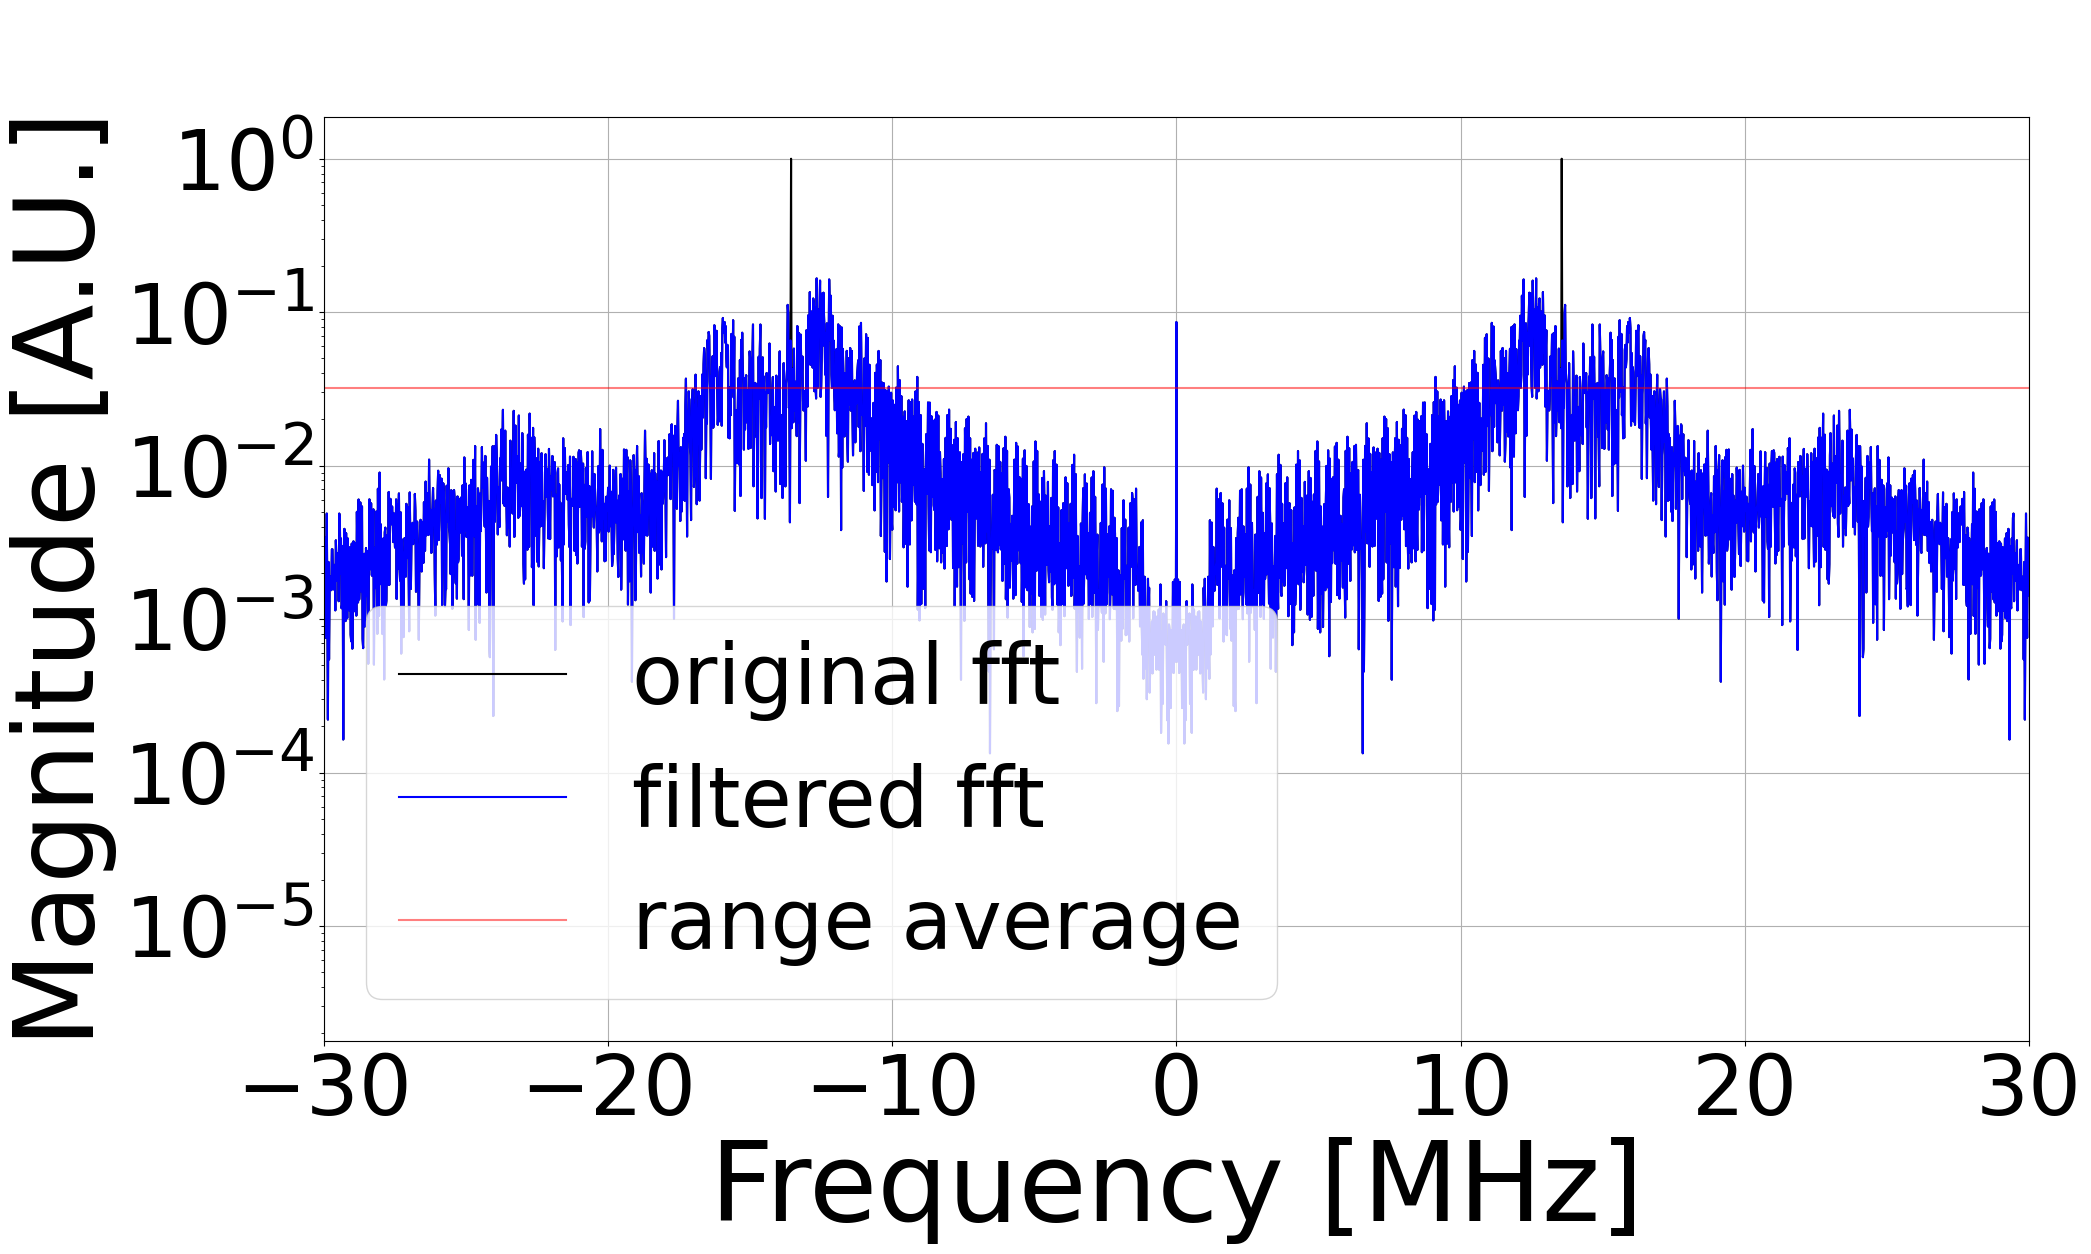

In [62]:
filtered_fft_shifted = fft.fftshift(filtered_fft)

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(magnitudes_shifted)/n, color = 'k', label = 'original fft')
plt.plot(freqs_shifted, np.abs(filtered_fft_shifted)/n, color = 'blue', label = 'filtered fft')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.semilogy()
plt.legend(loc = 'lower left',fontsize = 60)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [17]:
if (N%2 == 0):
    pos_filtered_fft = filtered_fft[:round((N/2))]
else:
    pos_filtered_fft = filtered_fft[:round((N-1)/2 + 1)]

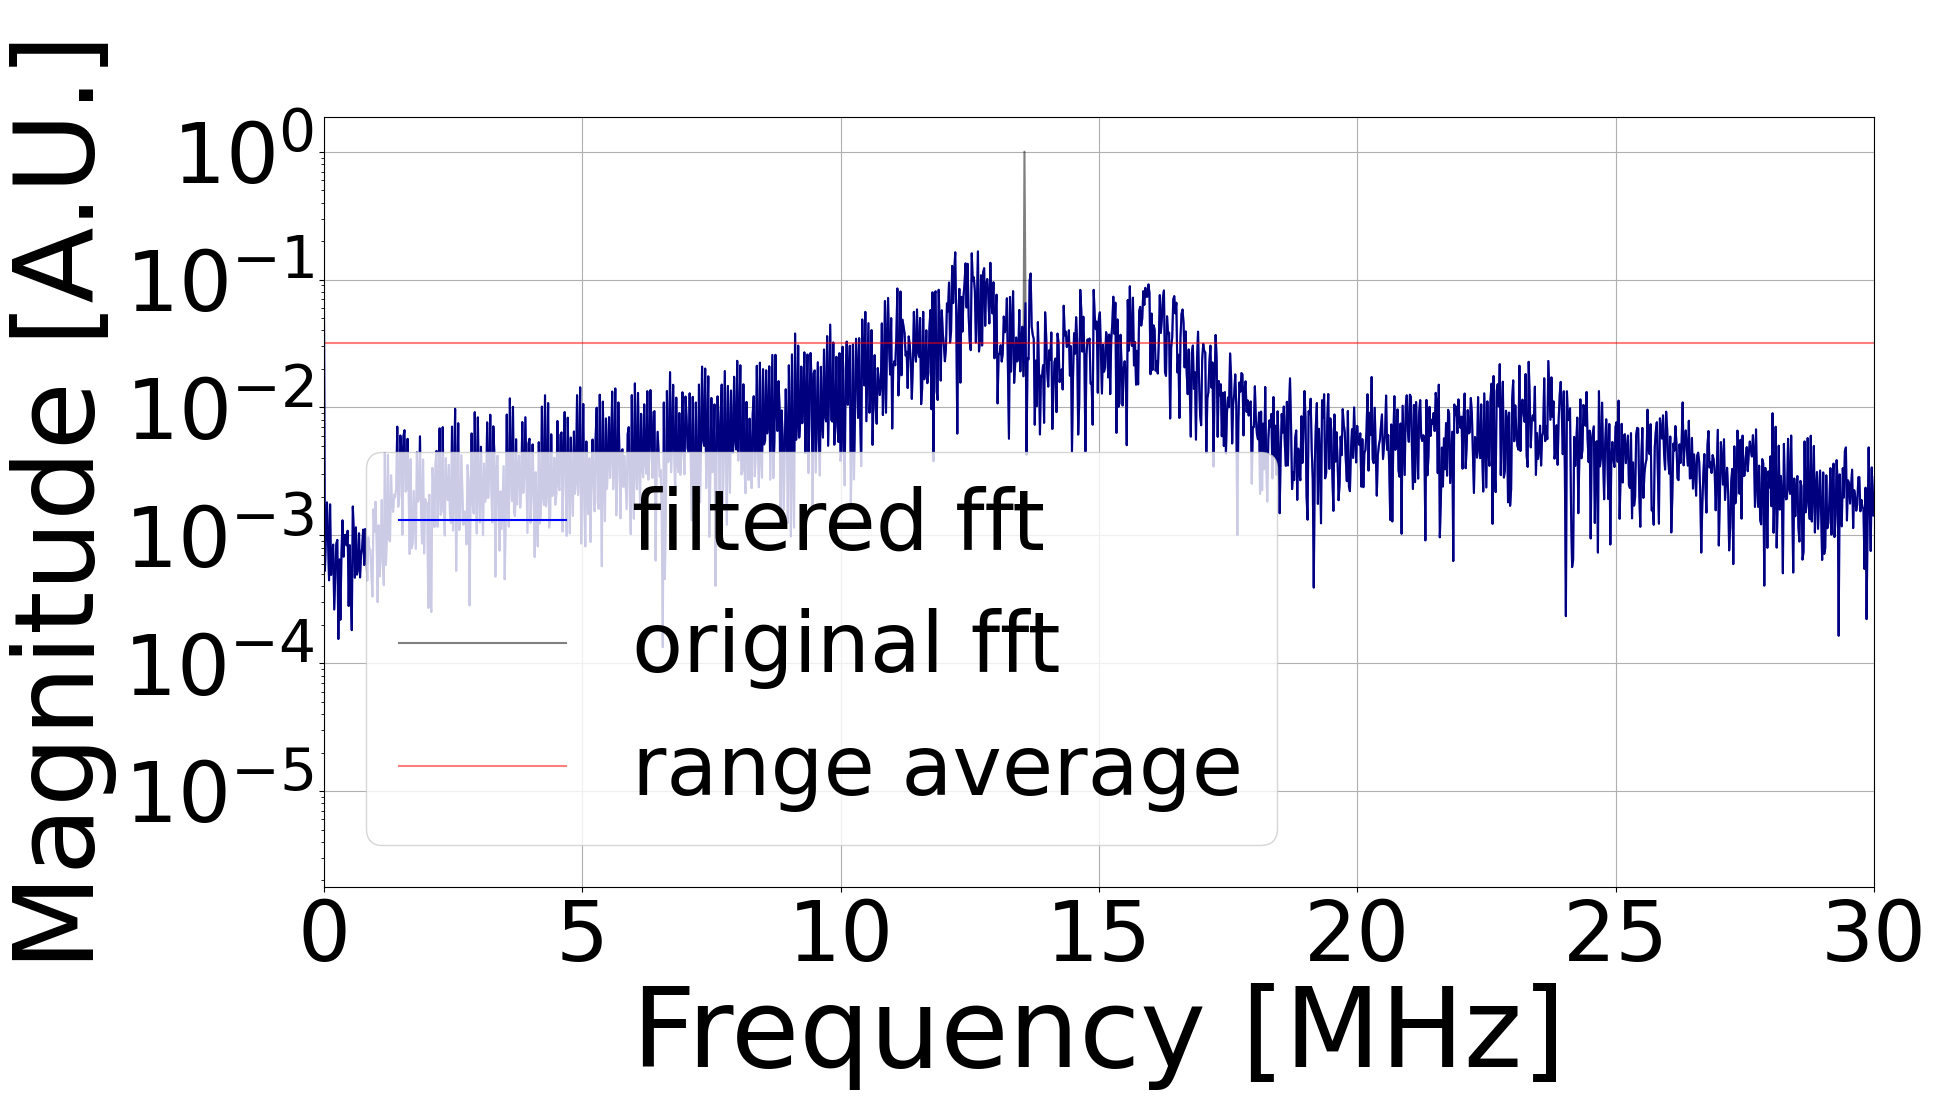

In [61]:
plt.figure(figsize=(22, 12))
plt.plot(pos_freqs, np.abs(pos_filtered_fft)/n, color = 'blue', label = 'filtered fft')
plt.plot(pos_freqs, np.abs(pos_magnitudes)/n, alpha = 0.5, color = 'k', label = 'original fft')
plt.axhline(range_avg, color = 'red', alpha = 0.5, label = 'range average')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, f2*2)
plt.semilogy()
plt.legend(loc = 'lower left',fontsize = 60)

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [64]:
reconstructed_wf = fft.ifft(magnitudes)

## IFFT

In [65]:
#times_ifft = np.arange(N) / f_s #it's right but it's the SAME as times
filtered_wf = fft.ifft(filtered_fft) #complex numbers, whole spectrum

## Compare to reconstructed waveform

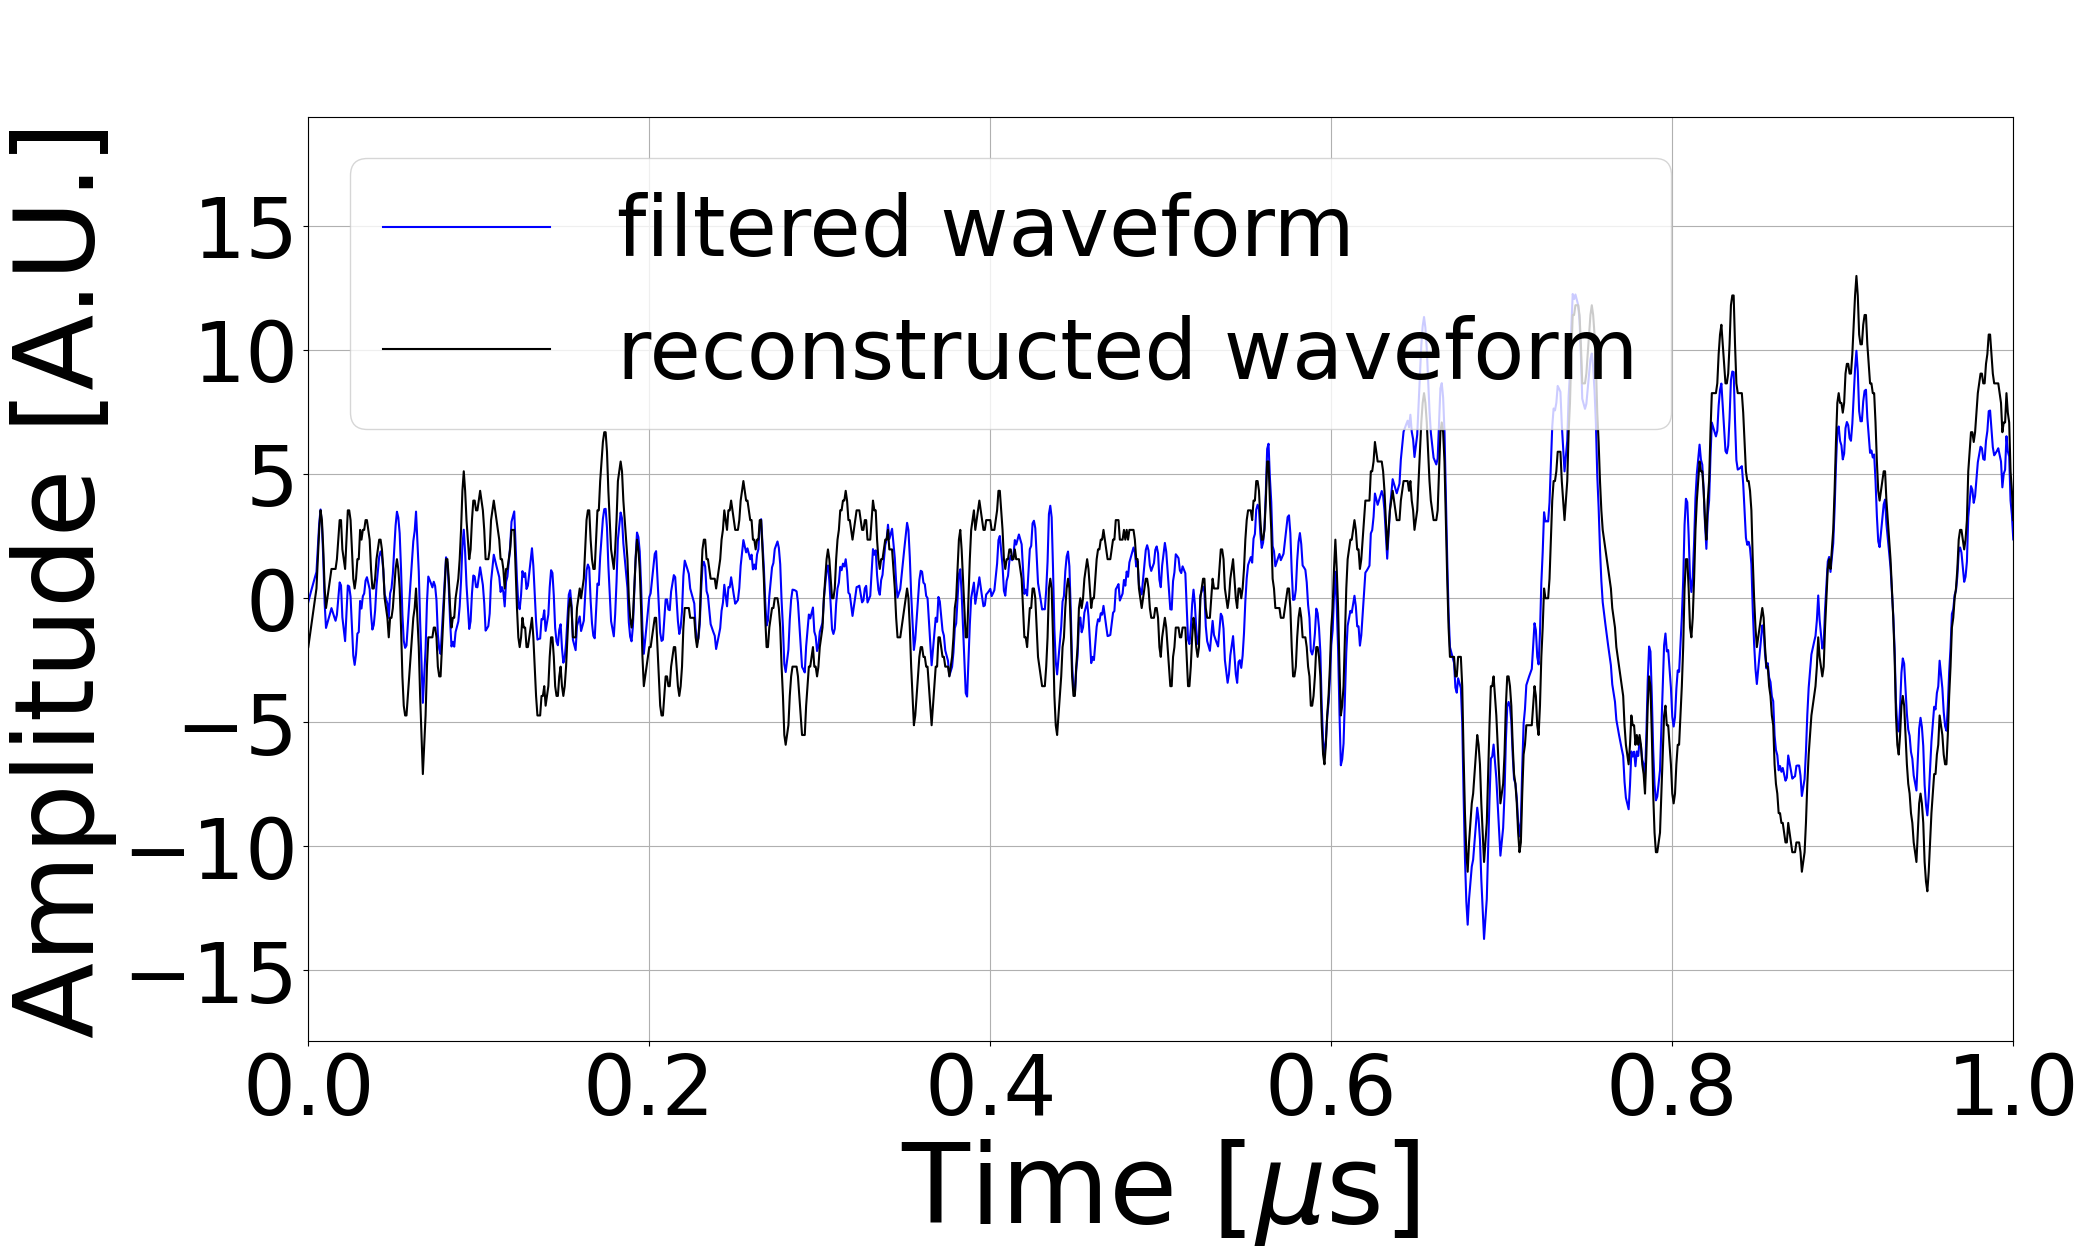

In [66]:
plt.figure(figsize = (22, 12))
plt.plot(times, filtered_wf.real, label = 'filtered waveform', color = 'blue') 
plt.plot(times, reconstructed_wf.real, label = 'reconstructed waveform', color = 'k')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("../Results/080824_15.42/Presentation/filtered_single_wf.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [68]:
noise_wf = reconstructed_wf - filtered_wf #both complex numbers arrays

In [23]:
A = max(noise_wf.real)
phi = phases[freqs == peak_f[0]]
f = peak_f[0]
coswave = A*np.cos(f * 2*np.pi*times + phi)

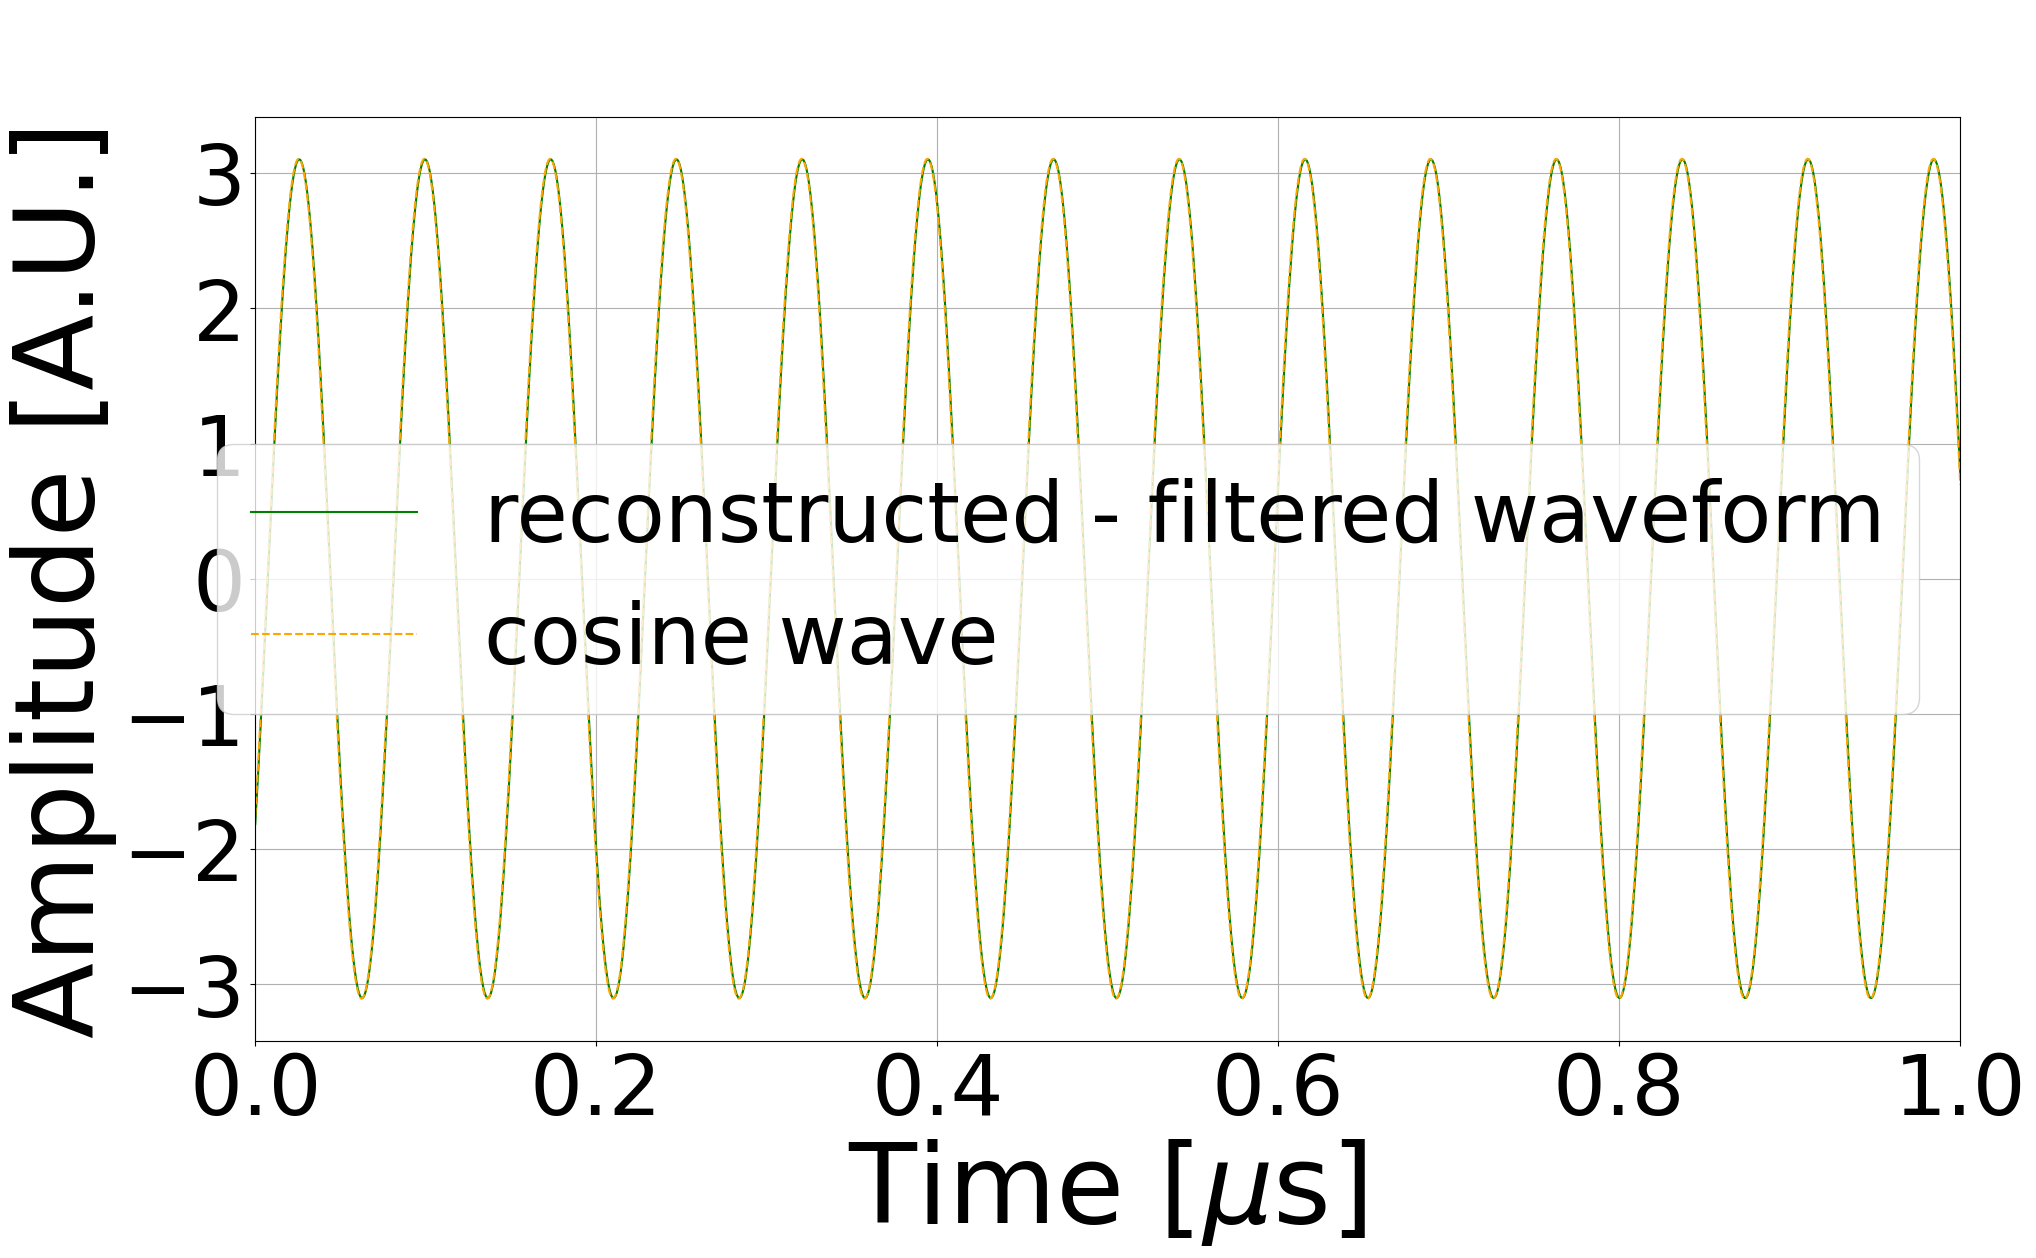

In [70]:
plt.figure(figsize = (22, 12))
plt.plot(times, noise_wf.real, label = 'reconstructed - filtered waveform', color = 'green')
plt.plot(times, coswave, label = 'cosine wave', color = 'orange', linestyle = '--')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Make sure reconstructed waveform and original waveform are the same

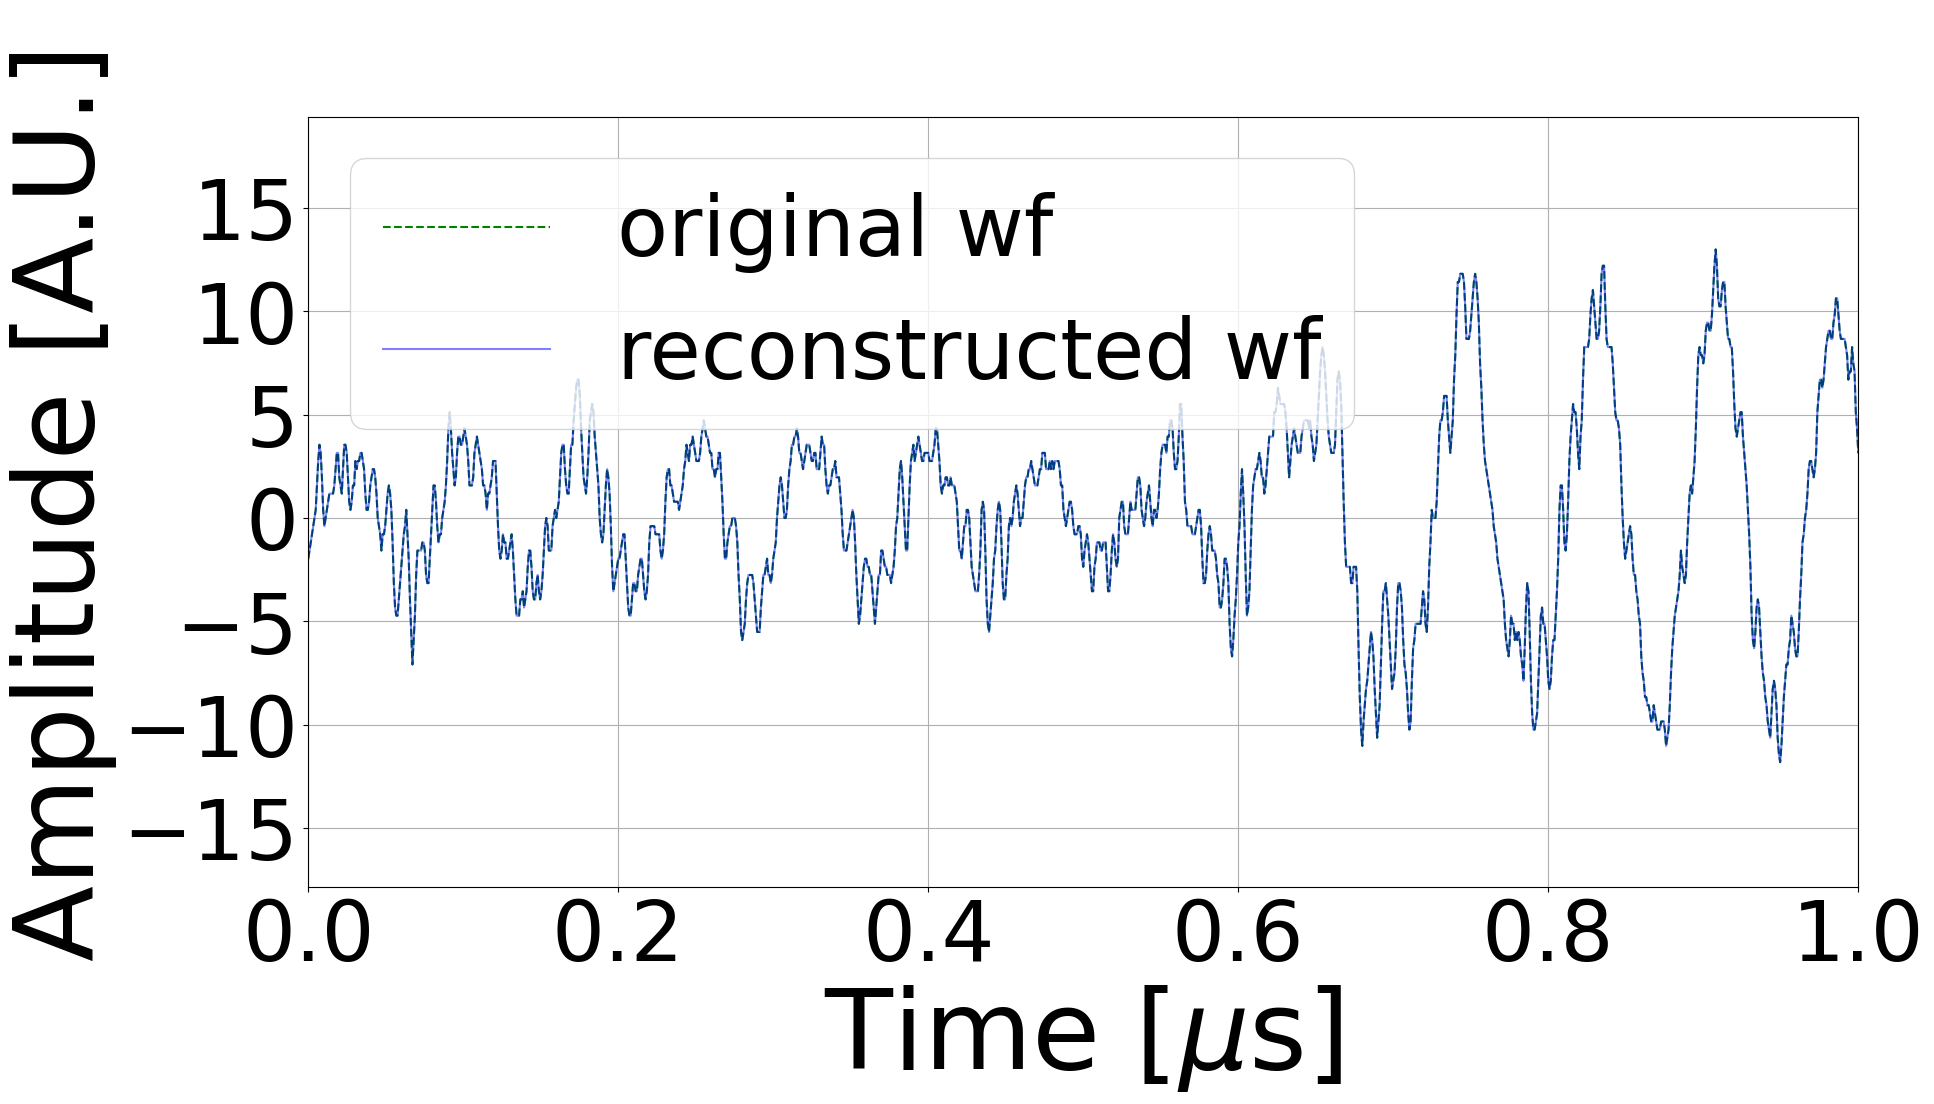

In [71]:
plt.figure(figsize = (20, 10))
plt.plot(times, amplitudes, label = 'original wf', color = 'green', linestyle = '--')
plt.plot(times, reconstructed_wf.real, label = 'reconstructed wf', color = 'blue', alpha = 0.5)

plt.title(' ', fontsize = 80)
plt.xlabel(r'Time [$\mu$s]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Amplitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(0, 1)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

# Plot reconstructed FFT

In [72]:
reconstructed_filtered_fft = fft.fft(filtered_wf)

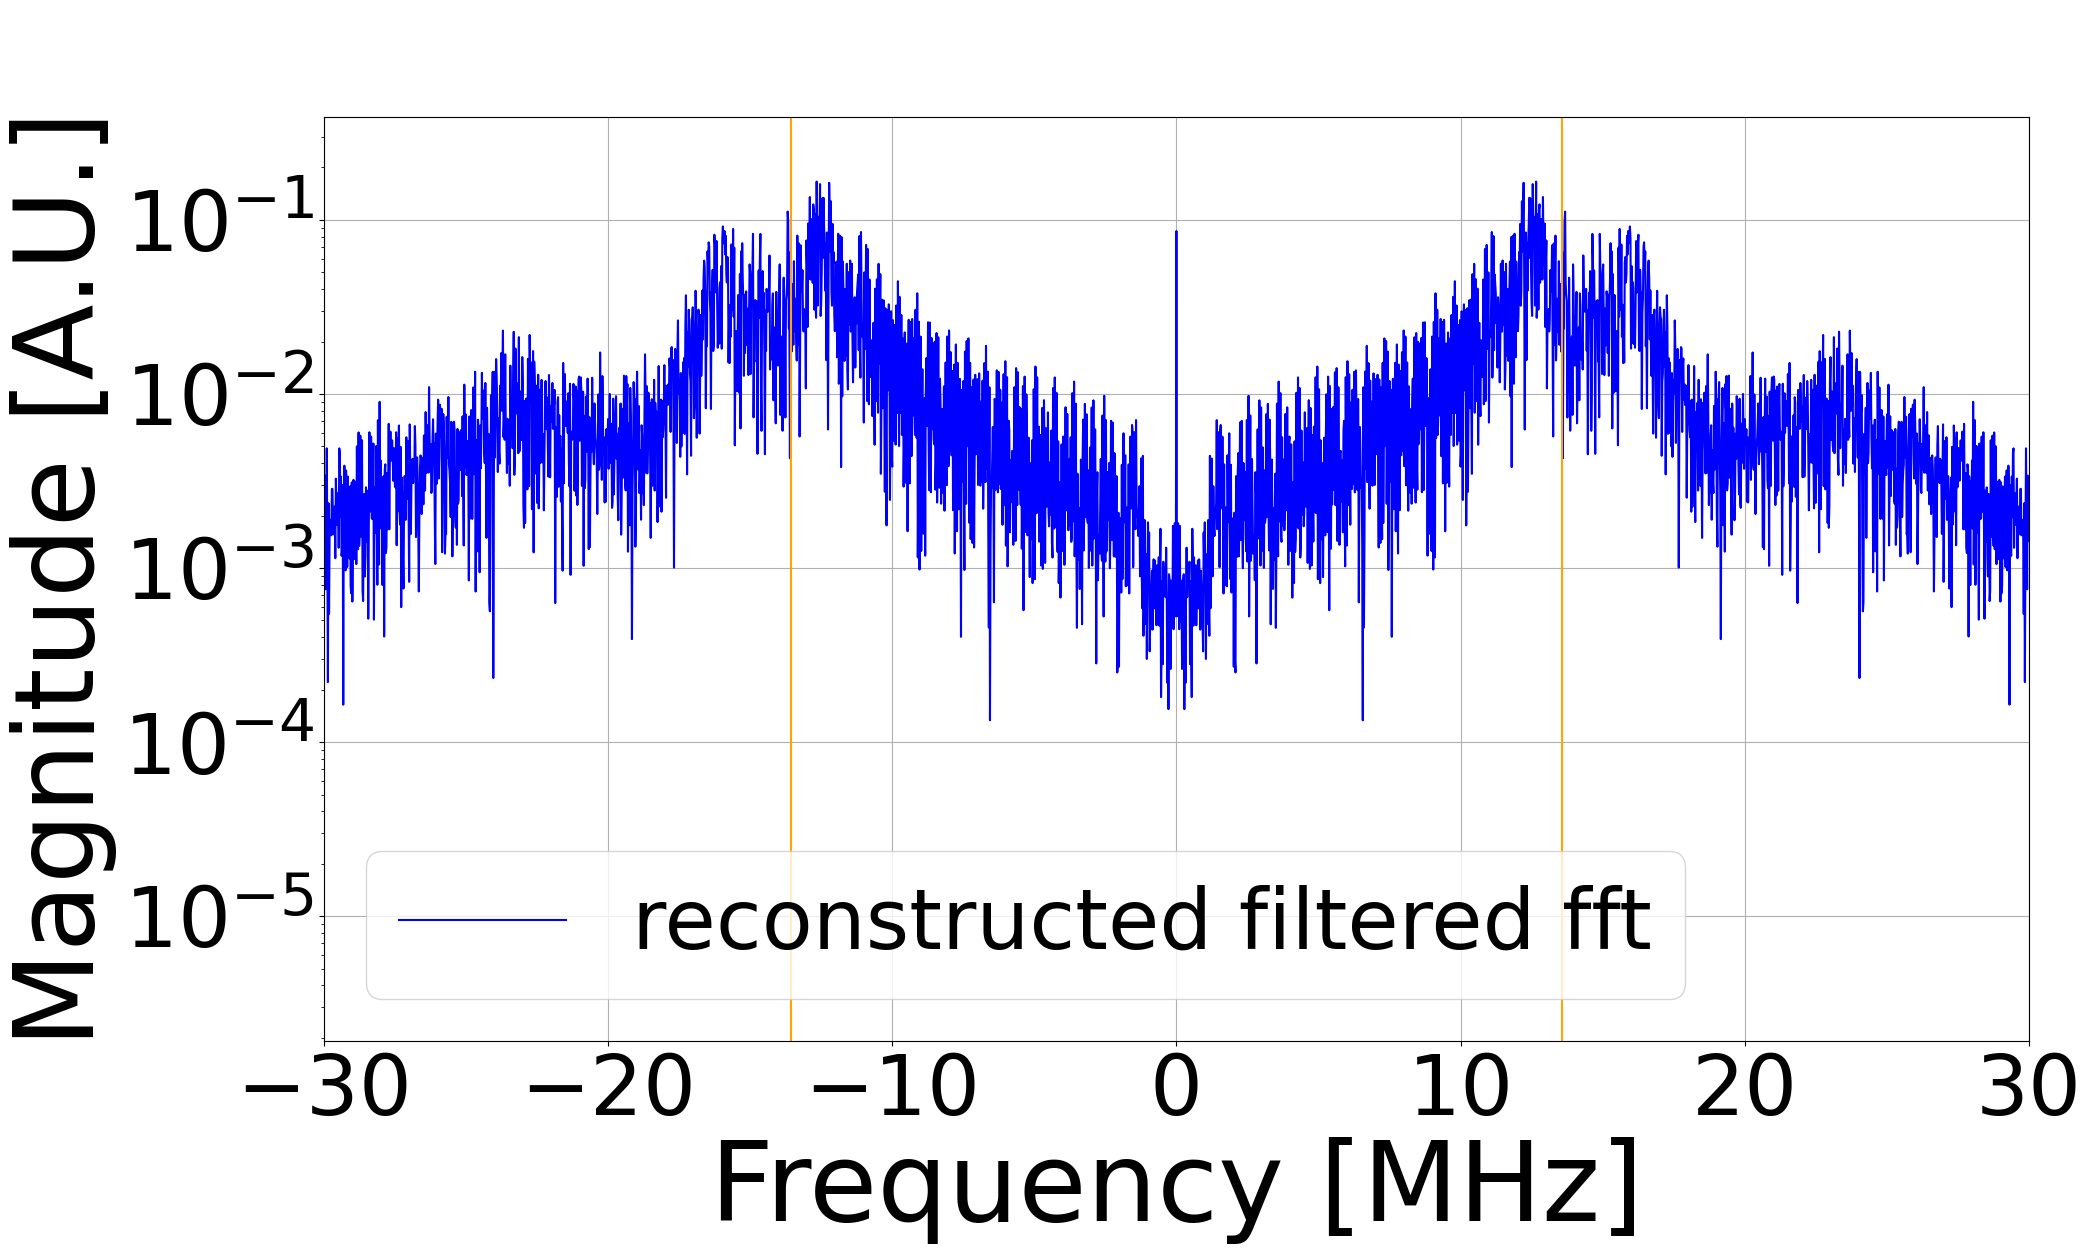

In [79]:
reconstructed_filtered_fft_shifted = fft.fftshift(reconstructed_filtered_fft) 

plt.figure(figsize=(22, 12))
plt.plot(freqs_shifted, np.abs(reconstructed_filtered_fft_shifted)/n, color = 'blue', label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')
plt.axvline(peak_f[1], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel('Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.xlim(-f2*2, f2*2)
plt.legend(loc = 'best', fontsize = 60)
plt.semilogy()

#plt.savefig("250724_17.23/fft.pdf", format = "pdf", bbox_inches="tight")
plt.show()

In [28]:
if (N%2 == 0):
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N/2))]
else:
    pos_reconstructed_filtered_fft = reconstructed_filtered_fft[:round((N-1)/2 + 1)]

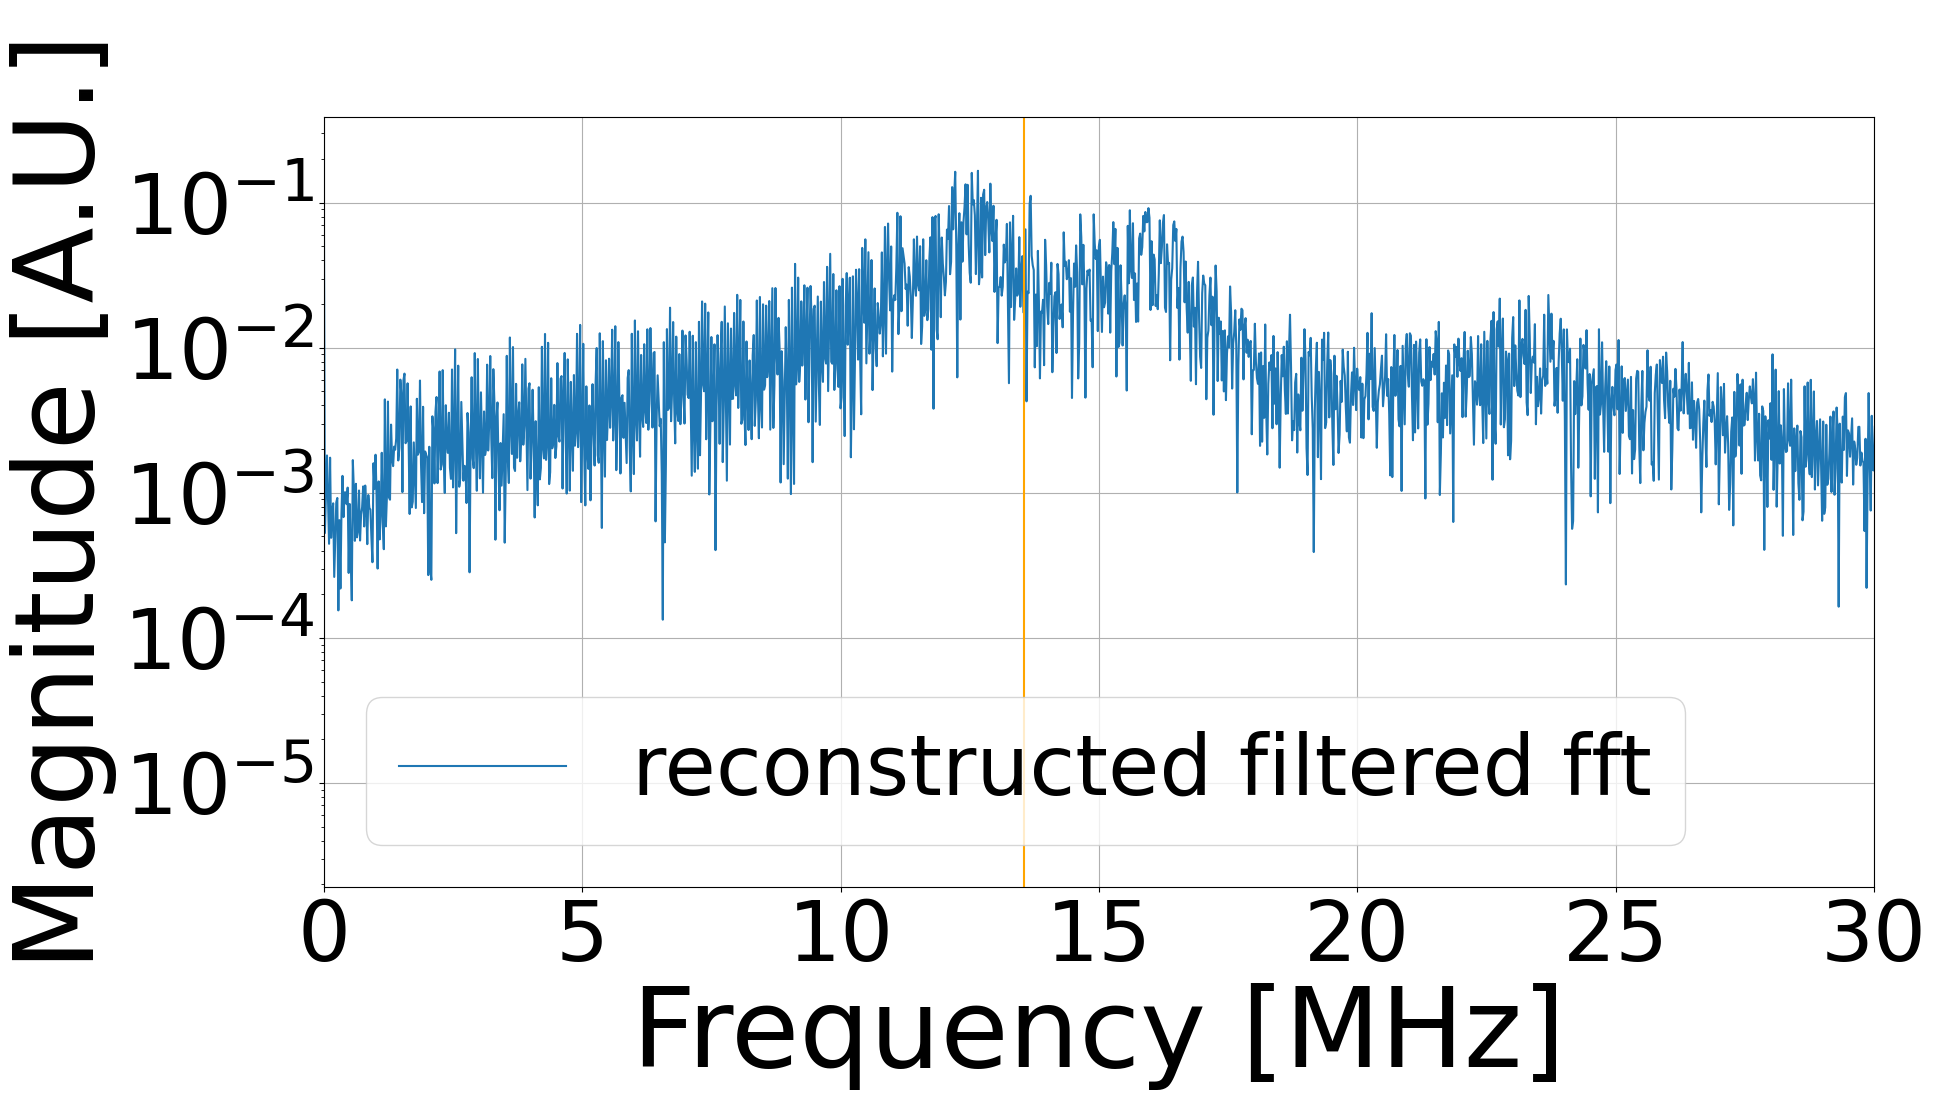

In [81]:
plt.figure(figsize = (20, 10))
plt.plot(pos_freqs, np.abs(pos_reconstructed_filtered_fft)/n, label = 'reconstructed filtered fft')
plt.axvline(peak_f[0], color = 'orange')

plt.title(' ', fontsize = 80)
plt.xlabel(r'Frequency [MHz]', fontsize = 80)
plt.xticks(fontsize = 60)
plt.ylabel('Magnitude [A.U.]', fontsize = 80)
plt.yticks(fontsize = 60)
plt.grid(True)
plt.semilogy()

plt.xlim(0, f2*2)
plt.legend(loc = 'best', fontsize = 60)

#plt.savefig("Results/simple_ifft.png", format = "png", bbox_inches="tight")
#plt.savefig("Results/simple_ifft.pdf", format = "pdf", bbox_inches="tight")
plt.show()